
# Machine Learning Assignment 2  
## Heart Disease Classification  

**Name:** Deepak

**ID:** 2025AA052290

**Email:** 2025aa05290@wilp.bits-pilani.ac.in

This notebook implements 6 classification models:
- Logistic Regression  
- Decision Tree  
- KNN  
- Naive Bayes  
- Random Forest  
- XGBoost  

Evaluation Metrics:
- Accuracy
- AUC
- Precision
- Recall
- F1 Score
- MCC


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, matthews_corrcoef,
    confusion_matrix, classification_report
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")


In [4]:

# Upload heart.csv before running

df = pd.read_csv("heart.csv")

print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nTarget Distribution:\n", df["target"].value_counts())

df.head()


Dataset Shape: (1025, 14)

Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Target Distribution:
 target
1    526
0    499
Name: count, dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:

X = df.drop("target", axis=1).values
y = df["target"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Any NaN in training data:", np.isnan(X_train_scaled).sum())


Any NaN in training data: 0


In [6]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}


In [7]:

results = {}

for name, model in models.items():

    print(f"\nTraining {name}...")

    if name in ["Logistic Regression", "KNN"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:,1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    results[name] = [accuracy, auc, precision, recall, f1, mcc]

    print("Accuracy:", accuracy)
    print("AUC:", auc)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("MCC:", mcc)



Training Logistic Regression...
Accuracy: 0.8097560975609757
AUC: 0.9298095238095239
Precision: 0.7619047619047619
Recall: 0.9142857142857143
F1 Score: 0.8311688311688312
MCC: 0.630908308763638

Training Decision Tree...
Accuracy: 0.9853658536585366
AUC: 0.9857142857142858
Precision: 1.0
Recall: 0.9714285714285714
F1 Score: 0.9855072463768116
MCC: 0.9711511393019859

Training KNN...
Accuracy: 0.8634146341463415
AUC: 0.9629047619047618
Precision: 0.8737864077669902
Recall: 0.8571428571428571
F1 Score: 0.8653846153846154
MCC: 0.7269351910363394

Training Naive Bayes...
Accuracy: 0.8292682926829268
AUC: 0.9042857142857142
Precision: 0.8070175438596491
Recall: 0.8761904761904762
F1 Score: 0.8401826484018264
MCC: 0.6601634114374199

Training Random Forest...
Accuracy: 1.0
AUC: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
MCC: 1.0

Training XGBoost...
Accuracy: 1.0
AUC: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
MCC: 1.0


In [8]:

results_df = pd.DataFrame(
    results,
    index=["Accuracy", "AUC", "Precision", "Recall", "F1 Score", "MCC"]
).T

results_df


,Accuracy,AUC,Precision,Recall,F1 Score,MCC
Logistic Regression,0.809756,0.929810,0.761905,0.914286,0.831169,0.630908
Decision Tree,0.985366,0.985714,1.000000,0.971429,0.985507,0.971151
KNN,0.863415,0.962905,0.873786,0.857143,0.865385,0.726935
Naive Bayes,0.829268,0.904286,0.807018,0.876190,0.840183,0.660163
Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
XGBoost,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Best Model: Random Forest


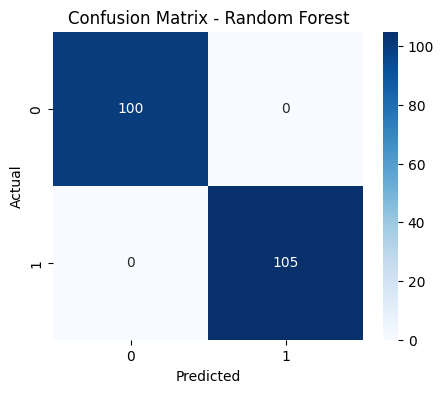


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [9]:

best_model_name = results_df["Accuracy"].idxmax()
print("Best Model:", best_model_name)

best_model = models[best_model_name]

if best_model_name in ["Logistic Regression", "KNN"]:
    y_pred_best = best_model.predict(X_test_scaled)
else:
    y_pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_best))


# app extraction

In [10]:
import joblib
import os

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}


# Create model folder
os.makedirs("model", exist_ok=True)

for name, model in models.items():
    filename = name.replace(" ", "_") + ".pkl"

    if name in ["Logistic Regression", "KNN"]:
        model.fit(X_train_scaled, y_train)
    else:
        model.fit(X_train, y_train)

    joblib.dump(model, f"model/{filename}")

# Save scaler separately
joblib.dump(scaler, "model/scaler.pkl")

print("All models saved successfully!")


All models saved successfully!
